202318041(Vishaka Nair)
202318047(Srushti Bhagchandani)

# **EDA**

In [ ]:
%%capture
%%bash
pip install imbalanced-learn

In [ ]:
#Read the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import sklearn as sk

In [ ]:
#Read credit data as df_train (training part)
df= pd.read_csv('/content/list_attr_celeba.csv', header=None)

<ipython-input-125-350699dee4a7>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/list_attr_celeba.csv', header=None)


In [ ]:
df.shape

(202600, 41)

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
1,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
2,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
3,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
4,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
5,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
6,000006.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,1
7,000007.jpg,1,-1,1,1,-1,-1,1,1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
8,000008.jpg,1,1,-1,1,-1,-1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
9,000009.jpg,-1,1,1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,1,-1,1,-1,-1,1


In [ ]:
df.columns=df.iloc[0]

In [ ]:
df.drop(df.index[0],axis=0,inplace=True)

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object', name=0)

In [ ]:
df.head(10)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
5,000006.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,1
6,000007.jpg,1,-1,1,1,-1,-1,1,1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
7,000008.jpg,1,1,-1,1,-1,-1,1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
8,000009.jpg,-1,1,1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,1,-1,1,-1,-1,1
9,000010.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1


In [ ]:
#Missing data can occur when no information is provided for one or more items or for a whole unit. Missing data is a very big problem in a real-life scenarios.
#Check if there is any missing value with isna() function and sum to count the NaN values
df.isna().sum()
#As a result, there is no missing value result.But without NaN value, we have '?' in our dataset.

0
image_id               0
5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       0
Wearing_Necktie        

In [ ]:
df.dropna(inplace=True)

In [ ]:
#Write a function to calculate IOR for each numerical attribute and show skewness
def detection_outlier(dfcolumn):
#Calculate Q1, Q3 and IQR
 Q1 = dfcolumn.quantile(0.25)
 Q3 = dfcolumn.quantile(0.75)
 IQR = Q3-Q1 #Interquartile range
#In general, constant should be 1.
 lower  = Q1-1*IQR
 higher = Q3+1*IQR
#Find number of outliers for specific column
 print('Before data preprocessing:')
 print('Skewness:',dfcolumn.skew())
 print(dfcolumn.describe())
 dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
 print('After replacing outliers by mean:')
 print('Skewness:',dfcolumn.skew())
 print('Median:',dfcolumn.median())
 print('IQR value:',IQR)
 print('Lower,Higher:',lower,',',higher)
 return

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  object
 2   Arched_Eyebrows      202599 non-null  object
 3   Attractive           202599 non-null  object
 4   Bags_Under_Eyes      202599 non-null  object
 5   Bald                 202599 non-null  object
 6   Bangs                202599 non-null  object
 7   Big_Lips             202599 non-null  object
 8   Big_Nose             202599 non-null  object
 9   Black_Hair           202599 non-null  object
 10  Blond_Hair           202599 non-null  object
 11  Blurry               202599 non-null  object
 12  Brown_Hair           202599 non-null  object
 13  Bushy_Eyebrows       202599 non-null  object
 14  Chubby               202599 non-null  object
 15  Double_Chin          202599 non-nu

In [ ]:
duplicate=df[df.duplicated()]

In [ ]:
duplicate.head(10)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young


In [ ]:
df1=df.drop(columns='image_id')

In [ ]:
X_train=X_train.dropna()

In [ ]:
unique_values=pd.unique((df1).values.flatten())

In [ ]:
print(df['Male'].value_counts())

Male
-1    108690
1      77526
-1      9475
1       6908
Name: count, dtype: int64


In [ ]:
print(unique_values)

[-1  1]


In [ ]:
df1 = df1.apply(pd.to_numeric, errors='coerce')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   5_o_Clock_Shadow     202599 non-null  int64
 1   Arched_Eyebrows      202599 non-null  int64
 2   Attractive           202599 non-null  int64
 3   Bags_Under_Eyes      202599 non-null  int64
 4   Bald                 202599 non-null  int64
 5   Bangs                202599 non-null  int64
 6   Big_Lips             202599 non-null  int64
 7   Big_Nose             202599 non-null  int64
 8   Black_Hair           202599 non-null  int64
 9   Blond_Hair           202599 non-null  int64
 10  Blurry               202599 non-null  int64
 11  Brown_Hair           202599 non-null  int64
 12  Bushy_Eyebrows       202599 non-null  int64
 13  Chubby               202599 non-null  int64
 14  Double_Chin          202599 non-null  int64
 15  Eyeglasses           202599 non-null  int64
 16  Go

In [ ]:
df1.corr()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,,,,,,,,,,,,,,,,,,,,,
5_o_Clock_Shadow,1.000000,-0.158587,-0.062415,0.168488,0.005584,-0.089243,-0.043699,0.152010,1.006038e-01,-0.132686,...,0.259370,-0.067777,0.052260,-0.124250,-0.161911,0.033997,-0.333921,-0.116239,0.097899,0.014869
Arched_Eyebrows,-0.158587,1.000000,0.250599,-0.091947,-0.069524,-0.027775,0.243400,-0.084025,-9.959764e-04,0.127009,...,-0.116001,0.093834,-0.054486,0.200835,0.294779,-0.099980,0.460409,0.220184,-0.132821,0.146798
Attractive,-0.062415,0.250599,1.000000,-0.178464,-0.145826,0.059712,0.062552,-0.277064,4.139890e-03,0.154774,...,-0.100229,0.147845,0.041550,0.214992,0.124349,-0.138636,0.480104,0.068738,-0.156420,0.387735
Bags_Under_Eyes,0.168488,-0.091947,-0.178464,1.000000,0.116215,-0.057568,-0.005982,0.361604,2.667485e-03,-0.106879,...,0.100411,0.112759,0.024208,-0.127128,-0.096969,-0.005726,-0.284052,-0.052964,0.196980,-0.230759
Bald,0.005584,-0.069524,-0.145826,0.116215,1.000000,-0.064044,-0.003577,0.180148,-8.036419e-02,-0.063056,...,0.058599,0.009402,-0.071920,-0.103482,-0.061211,-0.030625,-0.142852,-0.050445,0.176501,-0.196253
Bangs,-0.089243,-0.027775,0.059712,-0.057568,-0.064044,1.000000,0.034876,-0.069395,-3.355778e-02,0.098854,...,-0.073341,0.052469,0.020034,0.068166,0.058203,-0.079939,0.163378,0.114454,-0.092919,0.017695
Big_Lips,-0.043699,0.243400,0.062552,-0.005982,-0.003577,0.034876,1.000000,0.076814,6.719131e-02,0.023674,...,-0.039739,0.012885,-0.037144,0.120190,0.126523,-0.013286,0.195212,0.149892,-0.067770,0.107722
Big_Nose,0.152010,-0.084025,-0.277064,0.361604,0.180148,-0.069395,0.076814,1.000000,8.109064e-02,-0.158323,...,0.131667,0.100888,-0.028837,-0.131843,-0.058029,0.065552,-0.303651,-0.035930,0.205014,-0.284382
Black_Hair,0.100604,-0.000996,0.004140,0.002667,-0.080364,-0.033558,0.067191,0.081091,1.000000e+00,-0.233626,...,0.043231,-0.002533,0.112496,-0.085227,0.002348,-0.103605,-0.066856,-0.042539,0.023184,0.121372


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
strat_train,strat_test=train_test_split(df1,random_state=42,test_size=0.2)

In [ ]:
strat_train.head(10)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
170817,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
14657,-1,1,1,-1,-1,1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
118824,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,1,-1,1,-1,1
51009,-1,1,1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
36325,-1,-1,-1,-1,1,-1,1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,1,1
7047,-1,-1,-1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,-1,-1,-1,-1,-1,1
193649,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,1,-1,1
162097,-1,-1,1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,1,-1,1
138862,-1,1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
129220,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,1,1,-1,-1,1,-1,-1,1


In [ ]:
strat_test.head(10)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
93241,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,1,-1,-1,1,-1,-1,-1,-1,-1,1
121413,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
10624,1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
82523,-1,1,1,1,-1,-1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
73192,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,1,-1,1,-1,-1,-1,-1,-1
176199,-1,1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,1,-1,1,-1,-1,1
41601,-1,1,1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,1,-1,1,1,-1,1
65465,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,-1,-1,-1,-1,-1,-1
19027,-1,-1,-1,-1,-1,-1,-1,1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,1,1
164497,-1,1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,1,-1,1,1,-1,1,1,-1,-1


In [ ]:
X_train=strat_train

In [ ]:
X_train.head(10)

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
170817,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
14657,-1,1,1,-1,-1,1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,1,-1,-1,1
118824,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,1,1,-1,1,-1,1
51009,-1,1,1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
36325,-1,-1,-1,-1,1,-1,1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,1,1
7047,-1,-1,-1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,-1,-1,-1,-1,-1,1
193649,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,1,-1,1
162097,-1,-1,1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,1,-1,1
138862,-1,1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
129220,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,1,1,-1,-1,1,-1,-1,1


In [ ]:
X_test=strat_test

In [ ]:
 X_train1=X_train.copy()

In [ ]:
def division(U):
  a_data =U.loc[U['Male'] == -1]
  b_data =U.loc[U['Male'] == 1]
  return a_data,b_data


In [ ]:
A,B=division(X_train1)
print(B.head(10))


0       5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  Bald  \
170817                -1               -1          -1               -1    -1   
36325                 -1               -1          -1               -1     1   
5930                  -1               -1          -1               -1    -1   
134397                -1               -1          -1                1    -1   
89478                  1               -1          -1                1    -1   
148944                -1               -1          -1                1    -1   
121145                 1               -1          -1               -1    -1   
193190                -1               -1          -1                1    -1   
171135                 1               -1          -1                1    -1   
77824                 -1               -1          -1                1    -1   

0       Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  Sideburns  \
170817     -1        -1        -1         

# **Kmeans clustering**

In [ ]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 2.5 MB/s eta 0:00:00


In [ ]:
import prince

In [ ]:
import numpy as np
import pandas as pd
from prince import FAMD
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
# Kmeans Clustering

## Parameter setting 0
db0 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001,verbose=0, random_state=None, copy_x=True, algorithm='auto')
db0.fit(X_train)
y_pred_0 = db0.predict(X_train)

## Parameter setting 1
db1 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001,verbose=0, random_state=None, copy_x=True, algorithm='auto')
db1.fit(X_train)
y_pred_1 = db1.predict(X_train)



In [ ]:
df.shape

(202599, 41)

In [ ]:
X_train['y_pred_0']=y_pred_0
X_train['y_pred_1']=y_pred_1

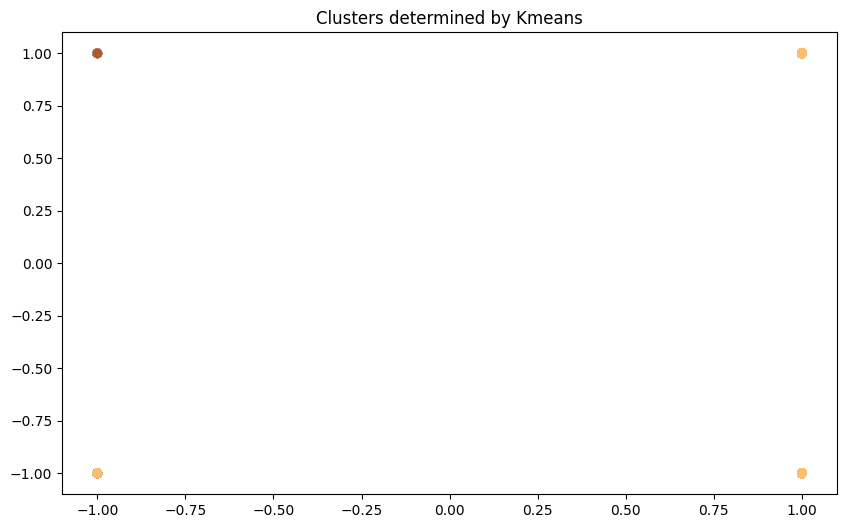

In [ ]:
# Kmeans Visualization
plt.figure(figsize=(10,6))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1],c=y_pred_0, cmap='Paired')
plt.title("Clusters determined by Kmeans")
db0.labels_[db0.labels_ == -1].size
plt.show()

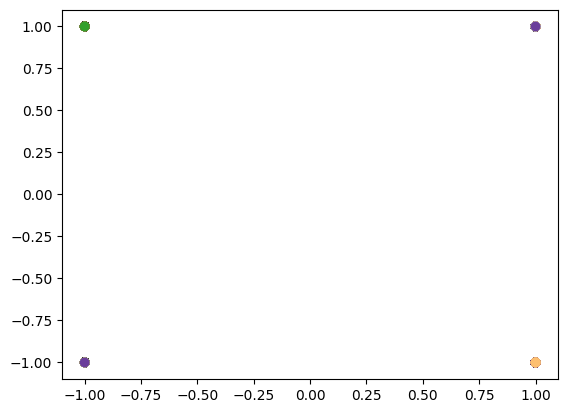

In [ ]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1],c=y_pred_1, cmap='Paired')
plt.show()

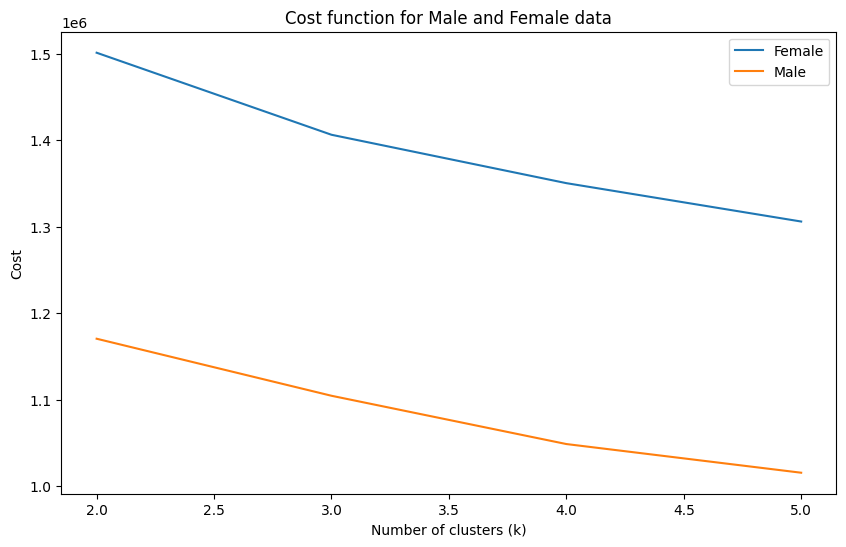

[1500991.7390956352, 1406198.9191583686, 1350297.1597334235, 1305942.6465636552]
[1170532.08823575, 1104626.715268643, 1048847.1429522787, 1015705.9018034233]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have divided your data into male and female dataframes, let's call them male_data and female_data
# Perform KMeans clustering for males
k_values = [2, 3, 4, 5]  # Define the values of k for clustering
costs_lower = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(A)  # Fit KMeans to male data
    costs_lower.append(kmeans.inertia_)  # Inertia_ gives the sum of squared distances of samples to their closest cluster center

# Perform KMeans clustering for females
costs_higher = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(B)  # Fit KMeans to female data
    costs_higher.append(kmeans.inertia_)  # Inertia_ gives the sum of squared distances of samples to their closest cluster center

# Plot the cost function for males and females
plt.figure(figsize=(10, 6))
plt.plot(k_values, costs_lower, label='Female')
plt.plot(k_values, costs_higher, label='Male')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Cost function for Male and Female data')
plt.legend()
plt.show()
print(costs_lower)
print(costs_higher)


In [ ]:
# Calculating the intrinsic measures

print('Intrinsic measures')
labels = y_pred_0
Silhouette_Score=metrics.silhouette_score(X_test, labels, metric = 'euclidean')
print('Silhouette Score:',Silhouette_Score)

# Calinski_harabasz_score

CH_score = metrics.calinski_harabasz_score(X_test, labels)
print('Calinski Harabasz Score:',CH_score)
print('-----------------------------------------------')

#Calculating the extrinsic measures
print('Extrinsic measures')
H_Score=metrics.homogeneity_score(Y_test, labels)
print('homogeneity_score:',H_Score)

v_measure_score=metrics.v_measure_score(Y_test, labels)
print('v_measure_score:',v_measure_score)


Intrinsic measures


ValueError: Found input variables with inconsistent numbers of samples: [40520, 162079]

In [ ]:
cluster_0 = set(y_pred_0)
cluster_1 = set(y_pred_1)

In [ ]:
print(cluster_0)

{0, 1, 2}


In [ ]:
print(cluster_1)

{0, 1, 2, 3, 4}


# **Functions**

In [ ]:
def initialize_centers(U, k):
    # Randomly select k data points as initial centers
    indices = np.random.choice(U.index, size=k, replace=False)
    centers = U.loc[indices]
    return centers


In [ ]:
print(initialize_centers(X_train1,3))

0       5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  Bald  \
134956                -1               -1          -1               -1    -1   
52770                  1               -1           1               -1    -1   
168723                -1               -1           1               -1    -1   

0       Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  Sideburns  \
134956     -1         1         1          -1          -1  ...         -1   
52770      -1        -1        -1          -1          -1  ...         -1   
168723      1        -1        -1          -1          -1  ...         -1   

0       Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  \
134956        1             -1         -1                -1            1   
52770        -1              1         -1                -1           -1   
168723        1             -1          1                -1           -1   

0       Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  Youn

In [ ]:
A,B=division(X_train1)

In [ ]:
print(len(A))

94488


In [ ]:
A1=pd.DataFrame(A)
print(A1.head(10))
B1=pd.DataFrame(B)
print(B1.head(10))

0       5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  Bald  \
14657                 -1                1           1               -1    -1   
118824                -1               -1          -1               -1    -1   
51009                 -1                1           1               -1    -1   
7047                  -1               -1          -1               -1    -1   
193649                -1               -1           1               -1    -1   
162097                -1               -1           1               -1    -1   
138862                -1                1           1               -1    -1   
129220                -1                1          -1               -1    -1   
72016                 -1                1           1               -1    -1   
131618                -1               -1          -1               -1    -1   

0       Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  Sideburns  \
14657       1        -1        -1         

In [ ]:
print(y_pred_0)

[2 1 1 ... 1 2 2]


In [ ]:
  U_partition = []
  for cluster_label in range(3):
        # Filter data points belonging to the current cluster
    cluster_data = X_train[y_pred_0 == cluster_label]

        # Create a DataFrame for the current cluster
    cluster_df = pd.DataFrame(data=cluster_data, columns=X_train1.columns)

        # Append the DataFrame to the list
    U_partition.append(cluster_df)

In [ ]:
print((U_partition[:2]))

[0       5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  Bald  \
51009                 -1                1           1               -1    -1   
193649                -1               -1           1               -1    -1   
131618                -1               -1          -1               -1    -1   
56366                 -1               -1           1               -1    -1   
137007                -1                1           1                1    -1   
...                  ...              ...         ...              ...   ...   
64925                 -1               -1           1               -1    -1   
175203                -1               -1          -1               -1    -1   
126324                -1               -1          -1               -1    -1   
112727                -1                1          -1               -1    -1   
54886                 -1                1           1               -1    -1   

0       Bangs  Big_Lips  Big_Nose  Bla

In [ ]:
for i, df in enumerate(U_partition):
    print(f"Cluster {i+1}:")
    print(df.head(5))  # Display the first 5 rows of each DataFrame
    print()

Cluster 1:
0       5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  Bald  \
51009                 -1                1           1               -1    -1   
193649                -1               -1           1               -1    -1   
131618                -1               -1          -1               -1    -1   
56366                 -1               -1           1               -1    -1   
137007                -1                1           1                1    -1   

0       Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  Sideburns  \
51009      -1        -1        -1          -1           1  ...         -1   
193649     -1         1        -1          -1          -1  ...         -1   
131618      1        -1        -1          -1          -1  ...         -1   
56366       1        -1        -1          -1           1  ...         -1   
137007     -1        -1        -1          -1          -1  ...         -1   

0       Smiling  Straight_Hair  Wavy_Hair  We

In [ ]:
for partition in U_partition:
  print(len(partition))

38535
47272
76272


In [ ]:
for partition in U_partition:
      X=pd.merge(partition,A,how='inner')
      print(X.head(10))

0  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  Bald  \
0                -1                1           1               -1    -1   
1                -1                1           1               -1    -1   
2                -1                1           1               -1    -1   
3                -1                1           1               -1    -1   
4                -1                1           1               -1    -1   
5                -1                1           1               -1    -1   
6                -1                1           1               -1    -1   
7                -1                1           1               -1    -1   
8                -1                1           1               -1    -1   
9                -1                1           1               -1    -1   

0  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  Sideburns  Smiling  \
0     -1        -1        -1          -1           1  ...         -1       -1   
1     -1    

In [ ]:
for partition in U_partition:
      X=pd.merge(partition,A,how='inner')
      #intersection_A = len(partition[partition.isin(A)].dropna())
      #X=partition[partition.isin(A)].dropna()
      #X=pd.DataFrame(X)
      #print(intersection_A)
      #print(X)
      #intersection_B = len(partition[partition.isin(B)].dropna())
      #Y=partition[partition.isin(B)].dropna()
      Y=pd.merge(partition,B,how='inner')
      #print(intersection_B)
      #print(Y)
      # Assuming 'column_name' is the name of the column you want to convert to numeric
   #   X['sex'] = pd.to_numeric(X['sex'], errors='coerce')
    #  Y['sex'] = pd.to_numeric(Y['sex'], errors='coerce')
      #meanA=np.mean(X)
      print(X.mean())
     # meanB=np.mean(Y)
      print(Y.mean())

0
5_o_Clock_Shadow      -0.999984
Arched_Eyebrows       -0.126534
Attractive             0.834758
Bags_Under_Eyes       -0.990273
Bald                  -0.999979
Bangs                 -0.872403
Big_Lips              -0.601231
Big_Nose              -0.990990
Black_Hair            -0.804354
Blond_Hair            -0.632181
Blurry                -0.984418
Brown_Hair            -0.313491
Bushy_Eyebrows        -0.965992
Chubby                -0.999132
Double_Chin           -0.999689
Eyeglasses            -0.995929
Goatee                -0.999984
Gray_Hair             -0.999079
Heavy_Makeup           0.650864
High_Cheekbones       -0.906674
Male                  -1.000000
Mouth_Slightly_Open   -0.821597
Mustache              -1.000000
Narrow_Eyes           -0.966018
No_Beard               0.999898
Oval_Face             -0.568551
Pale_Skin             -0.949788
Pointy_Nose           -0.298177
Receding_Hairline     -0.988998
Rosy_Cheeks           -0.993953
Sideburns             -0.999995
Smilin

new function

In [ ]:
def alphabetamu(U,U_partition):
  alpha_values = []
  beta_values = []
  muA=[]
  muB=[]
  l=[]
  A,B=division(U)
  total_A = len(A)
  print(total_A)
  total_B = len(B)
  print(total_B)

  for partition in U_partition:
      X=pd.merge(partition,A,how='inner')
      Y=pd.merge(partition,B,how='inner')
      intersection_A = len(X)
      print(intersection_A)
      intersection_B = len(Y)
      print(intersection_B)
      meanA=X.mean()
      meanB=Y.mean()
      li=np.linalg.norm(meanA-meanB)
      alpha_i = intersection_A / total_A
      beta_i = intersection_B / total_B
      muA.append(meanA)
      muB.append(meanB)
      alpha_values.append(alpha_i)
      beta_values.append(beta_i)
      l.append(li)
  return alpha_values,beta_values,muA,muB,l

new function

In [ ]:
def total_deviation_from_mean_A_for_clusters(U_partition,A):
    total_deviation_A = 0
    A=pd.DataFrame(A)

    for partition in U_partition:
        partition=pd.DataFrame(partition)
        X=pd.merge(partition,A,how='inner')
        intersection_A = len(X)
        meanA=X.mean()
          # Calculate the deviation of each point in the intersection of Ui and A from the mean of group A
        deviations_A_intersect_Ui =np.abs(X - meanA)

          # Calculate the total deviation for the cluster and add it to the total deviation for all clusters
        total_deviation_A += np.sum(deviations_A_intersect_Ui)
     # except:
          #print("No more division")

    return total_deviation_A


In [ ]:
total_deviation_from_mean_A_for_clusters(U_partition,A)

0
5_o_Clock_Shadow           63.993690
Arched_Eyebrows        712212.708515
Attractive             184861.117496
Bags_Under_Eyes         61348.794646
Bald                       59.998040
Bangs                  240486.489029
Big_Lips               403022.750349
Big_Nose                50403.823555
Black_Hair             365861.474456
Blond_Hair             597466.993206
Blurry                  48828.066226
Brown_Hair             735079.384011
Bushy_Eyebrows          54692.662240
Chubby                   4984.228857
Double_Chin              3901.128180
Eyeglasses              18946.040745
Goatee                     35.998353
Gray_Hair                4434.577794
Heavy_Makeup           287232.189150
High_Cheekbones        124143.694695
Male                        0.000000
Mouth_Slightly_Open    402432.676851
Mustache                    3.999957
Narrow_Eyes             72380.788812
No_Beard                  487.752210
Oval_Face              628842.927294
Pale_Skin               46335.588342

new function

In [ ]:
def total_deviation_from_mean_B_for_clusters(U_partition,B):
    total_deviation_B = 0
    B=pd.DataFrame(B)

    for partition in U_partition:
        partition=pd.DataFrame(partition)
        Y=pd.merge(partition,B,how='inner')
        intersection_B = len(Y)
        meanB=Y.mean()
        # Calculate the deviation of each point in the intersection of Ui and A from the mean of group A
        deviations_B_intersect_Ui =np.abs(Y - meanB)
        # Calculate the total deviation for the cluster and add it to the total deviation for all clusters
        total_deviation_B += np.sum(deviations_B_intersect_Ui)

    return total_deviation_B


In [ ]:
total_deviation_from_mean_B_for_clusters(U_partition,B)

0
5_o_Clock_Shadow       164355.048653
Arched_Eyebrows         16996.109287
Attractive             299490.341698
Bags_Under_Eyes        213642.238657
Bald                    24593.856934
Bangs                   64414.780368
Big_Lips                59311.113404
Big_Nose               215625.830559
Black_Hair             338058.464792
Blond_Hair               9139.097970
Blurry                  67362.218749
Brown_Hair             190600.135774
Bushy_Eyebrows         177760.855164
Chubby                  48744.807164
Double_Chin             42999.523870
Eyeglasses              91805.674917
Goatee                  61774.450214
Gray_Hair               62300.663283
Heavy_Makeup              705.707843
High_Cheekbones        197660.483206
Male                        0.000000
Mouth_Slightly_Open    377227.490451
Mustache                34757.821346
Narrow_Eyes             51368.956849
No_Beard               206013.074886
Oval_Face              169151.015000
Pale_Skin                8487.774310

In [ ]:
def f_A(U_partition,alpha_values,x,A,mu_A):
    # Calculate the deviation of x from the mean of group A
    deviation_A =total_deviation_from_mean_A_for_clusters(U_partition, mu_A)

    # Calculate the first term of f_A
    delta_A = deviation_A / len(A)
    #x=np.array(x)

    # Calculate the second term of f_A
    sum_term = np.sum([alpha_values[i] * x[i]**2 for i in range(len(x))])

    # Calculate f_A
    f_A = delta_A + sum_term
    return f_A


In [ ]:
def f_B(U_partition, beta_values, distances,x,B,mu_B):
    # Calculate the deviation of x from the mean of group B
    deviation_B = total_deviation_from_mean_B_for_clusters(U_partition, mu_B)

    # Calculate the first term of f_B
    delta_B = deviation_B / len(B)
    x=np.array(x)
    # Calculate the second term of f_B
    sum_term = np.sum([beta_values[i] * (distances[i] - x[i])**2 for i in range(len(x))])

    # Calculate f_B
    f_B = delta_B + sum_term
    return f_B

# **Fair Lloyd function**

In [ ]:
def Line_Search(U, U_partition, A, B, k, T):
    # Compute alpha, beta, mu_Ai, mu_Bi, l_i, M_A, M_B (Refer to Definition 1)
    alpha, beta, mu_A, mu_B, l = alphabetamu(X_train1, U_partition)
    gamma = 0.5
    x = [0] * k
     # Desired number of elements in x

    for t in range(T):
        for i in range(k):
            # Calculating new value for x_i
            x_i = (1 - gamma) * beta[i] * l[i] / (gamma * alpha[i] + (1 - gamma) * beta[i])
            # Ensuring x_i is within the bounds [0, l_i]
            x_i = max(0, min(x_i, l[i]))

            # Updating x with the new value
            x[i] = x_i



        # Computing f_A(x) and f_B(x)
        f_A_x = f_A(U_partition, alpha, x, A, mu_A)
        #print(f_A_x)
        f_B_x = f_B(U_partition, beta, l, x, B, mu_B)
       # print(f_B_x)

        # Adjusting gamma based on the comparison of f_A(x) and f_B(x)
        if f_A_x.max() > f_B_x.max():
            gamma += (0.5) ** -(t + 1)
        elif f_A_x.max() < f_B_x.max():
            gamma -= (0.5) ** -(t + 1)
        else:
            break

    # Computing the updated centers c_i
    centers = [((l[i] - x[i]) * mu_A[i] + x[i] * mu_B[i]) / l[i] for i in range(k)]
    #print("Centers:", centers)
    return centers

In [ ]:
Line_Search(X_train1,U_partition,A,B,3,100)

94488
67591
373379
492
420620
328
92843
481779


<ipython-input-238-5bda97045d36>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-238-5bda97045d36>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-238-5bda97045d36>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-240-2d5e6df7613b>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-240-2d5e6df7613b>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-240-2d5e6df7613

[0
 5_o_Clock_Shadow      -0.999984
 Arched_Eyebrows       -0.126534
 Attractive             0.834758
 Bags_Under_Eyes       -0.990273
 Bald                  -0.999979
 Bangs                 -0.872403
 Big_Lips              -0.601231
 Big_Nose              -0.990990
 Black_Hair            -0.804354
 Blond_Hair            -0.632181
 Blurry                -0.984418
 Brown_Hair            -0.313491
 Bushy_Eyebrows        -0.965992
 Chubby                -0.999132
 Double_Chin           -0.999689
 Eyeglasses            -0.995929
 Goatee                -0.999984
 Gray_Hair             -0.999079
 Heavy_Makeup           0.650864
 High_Cheekbones       -0.906674
 Male                  -1.000000
 Mouth_Slightly_Open   -0.821597
 Mustache              -1.000000
 Narrow_Eyes           -0.966018
 No_Beard               0.999898
 Oval_Face             -0.568551
 Pale_Skin             -0.949788
 Pointy_Nose           -0.298177
 Receding_Hairline     -0.988998
 Rosy_Cheeks           -0.993953
 Sidebu

In [ ]:
A_numeric = A.select_dtypes(include=[np.number])
B_numeric = B.select_dtypes(include=[np.number])


In [ ]:
print(X_train1.head(2))

0       5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  Bald  \
170817                -1               -1          -1               -1    -1   
14657                 -1                1           1               -1    -1   

0       Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  ...  Straight_Hair  \
170817     -1        -1        -1          -1          -1  ...             -1   
14657       1        -1        -1           1          -1  ...             -1   

0       Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
170817         -1                -1            1                -1   
14657          -1                -1           -1                 1   

0       Wearing_Necklace  Wearing_Necktie  Young  y_pred_0  y_pred_1  
170817                -1               -1     -1         1         2  
14657                 -1               -1      1         0         4  

[2 rows x 42 columns]


In [ ]:
print(A_numeric.shape)

(94488, 40)


94488
67591
373379
492
420620
328
92843
481779


<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c

94488
67591
373379
492
420620
328
92843
481779


<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c

94488
67591
373379
492
420620
328
92843
481779


<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c

94488
67591
373379
492
420620
328
92843
481779


<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c

94488
67591
373379
492
420620
328
92843
481779


<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c

94488
67591
373379
492
420620
328
92843
481779


<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-249-f99202c0dccd>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  X=pd.merge(partition,A,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c5>:7: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  Y=pd.merge(partition,B,how='inner')
<ipython-input-251-87a7ffe0f7c

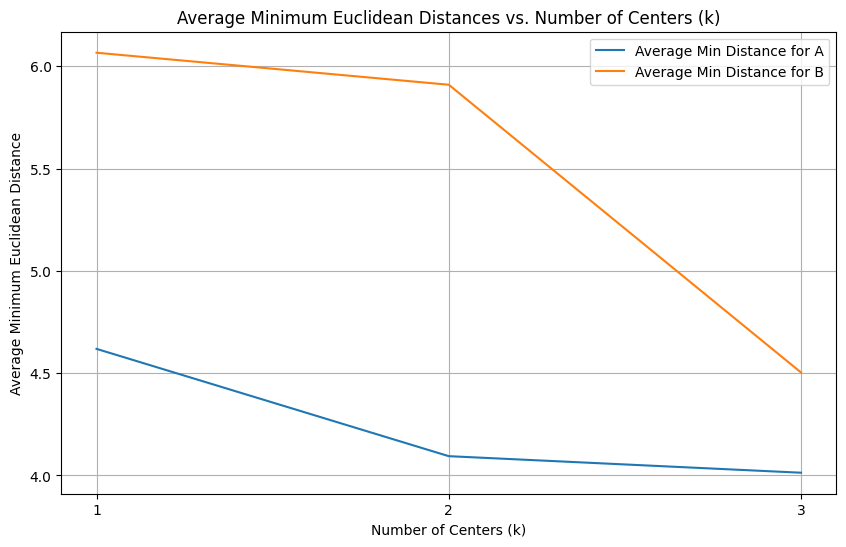

In [ ]:
def euclidean_distance(point, center):
    return np.sqrt(np.sum((point - center) ** 2))

def average_min_distance(data, centers):
    distances = []
    for index, point in data.iterrows():
        min_distance = np.min([euclidean_distance(point.values, center) for center in centers])
        distances.append(min_distance)
    return np.mean(distances)

# Values of k to test
k_values = range(1, 4)

# Store average distances for plotting
average_distances_A = []
average_distances_B = []

for k in k_values:
    avg_dist_A = average_min_distance(A_numeric,Line_Search(X_train1, U_partition, A_numeric, B_numeric, k, 100))
    avg_dist_B = average_min_distance(B_numeric,Line_Search(X_train1, U_partition, A_numeric, B_numeric, k, 100))

    average_distances_A.append(avg_dist_A)
    average_distances_B.append(avg_dist_B)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_distances_A, label='Average Min Distance for A')
plt.plot(k_values, average_distances_B, label='Average Min Distance for B')
plt.title('Average Minimum Euclidean Distances vs. Number of Centers (k)')
plt.xlabel('Number of Centers (k)')
plt.ylabel('Average Minimum Euclidean Distance')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()